## Importing Libraries

In [1]:
# Importing related libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud # For most repeated words
import json
import warnings
warnings.filterwarnings("ignore")

## Data Loading
Importing the two datasets and merging them.

In [2]:
credits_df=pd.read_csv("C:\\Users\\rutik\\OneDrive\\Desktop\\credits.csv",encoding = 'latin1')
movies_df=pd.read_csv("C:\\Users\\rutik\\OneDrive\\Desktop\\merge.csv",encoding = 'latin1')

In [3]:
credits_df.columns = ['id','tittle','cast','crew']
df= credits_df.merge(movies_df,on='id')

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   tittle                4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

## Data Cleaning and Preprocessing

In [5]:
df_EDA = df.copy(deep=True)
df_EDA.isnull().sum()

id                         0
tittle                     0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
df_EDA.drop(['homepage', 'tagline', 'id', 'overview', 'original_title', 'tittle'] ,axis = 1,inplace = True)

In [7]:
df_EDA['runtime'] = df_EDA['runtime'].fillna(df_EDA['runtime'].mean())

In [8]:
df_EDA = df_EDA.dropna()
df_EDA = df_EDA.drop_duplicates()
df_EDA.isnull().sum()

cast                    0
crew                    0
budget                  0
genres                  0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [9]:
df_EDA

,cast,crew,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,El Mariachi,6.6,238
4799,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],en,0.642552,[],[],26-12-2011,0,85.0,[],Released,Newlyweds,5.9,5
4800,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",13-10-2013,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Signed, Sealed, Delivered",7.0,6
4801,"[{""cast_id"": 3, ""character"

In [10]:
df_EDA['release_date'] = pd.to_datetime(df_EDA['release_date'], format='%d-%m-%Y')
df_EDA['year'] = df_EDA['release_date'].dt.year
df_EDA['year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: year, Length: 4802, dtype: int32

In [11]:
df_EDA['profit'] = df_EDA['revenue'] - df_EDA['budget']
df_EDA['is_profitable'] = df_EDA['profit'] > 0

In [12]:
csv_file_path = 'combine.csv'
df_EDA.to_csv(csv_file_path, index=False)

In [13]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4802 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cast                  4802 non-null   object        
 1   crew                  4802 non-null   object        
 2   budget                4802 non-null   int64         
 3   genres                4802 non-null   object        
 4   keywords              4802 non-null   object        
 5   original_language     4802 non-null   object        
 6   popularity            4802 non-null   float64       
 7   production_companies  4802 non-null   object        
 8   production_countries  4802 non-null   object        
 9   release_date          4802 non-null   datetime64[ns]
 10  revenue               4802 non-null   int64         
 11  runtime               4802 non-null   float64       
 12  spoken_languages      4802 non-null   object        
 13  status                4

In [14]:
df_EDA.head(5)

,cast,crew,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year,profit,is_profitable
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2009,2550965087,True
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,661000000,True
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,2015,635674609,True
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,2012,834939099,True
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,2012,24139100,True


## EDA (Exploratory Data Analysis)

### Overview  

**Q0** : First overview.

In [15]:
df_EDA.describe()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,year,profit
count,4.802000e+03,4802.000000,4802,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4.802000e+03
mean,2.905109e+07,21.496776,2002-12-27 23:45:54.352353280,8.227777e+07,106.898116,6.093440,690.361724,2002.468763,5.322668e+07
min,0.000000e+00,0.000372,1916-09-04 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1916.000000,-1.657101e+08
25%,8.000000e+05,4.671734,1999-07-14 00:00:00,0.000000e+00,94.000000,5.600000,54.000000,1999.000000,-7.997688e+05
50%,1.500000e+07,12.924931,2005-10-03 00:00:00,1.917498e+07,103.500000,6.200000,235.500000,2005.000000,2.529443e+06
75%,4.000000e+07,28.332017,2011-02-16 00:00:00,9.291920e+07,117.750000,6.800000,737.000000,2011.000000,5.533980e+07
max,3.800000e+08,875.581305,2017-02-03 00:00:00,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000,2.550965e+09
std,4.072447e+07,31.818451,NaN,1.628697e+08,22.556893,1.191496,1234.674268,12.414354,1.359797e+08


 Movie with high popularity over all years ?

In [16]:
def find_popularity(year_1 = 0 , year_2 = 0) :
    sorted_popularity = df_EDA.sort_values(by = 'popularity',ascending= False)
    if year_2 == 0 :
        year_2 = year_1
    if year_1 != 0 :
        sorted_popularity.query('year >= @year_1 and year <= @year_2',inplace = True)
    plt.subplots(figsize=(10,8))
    plt.gca().invert_yaxis()
    plt.barh(sorted_popularity['title'].head(10),sorted_popularity['popularity'].head(10))

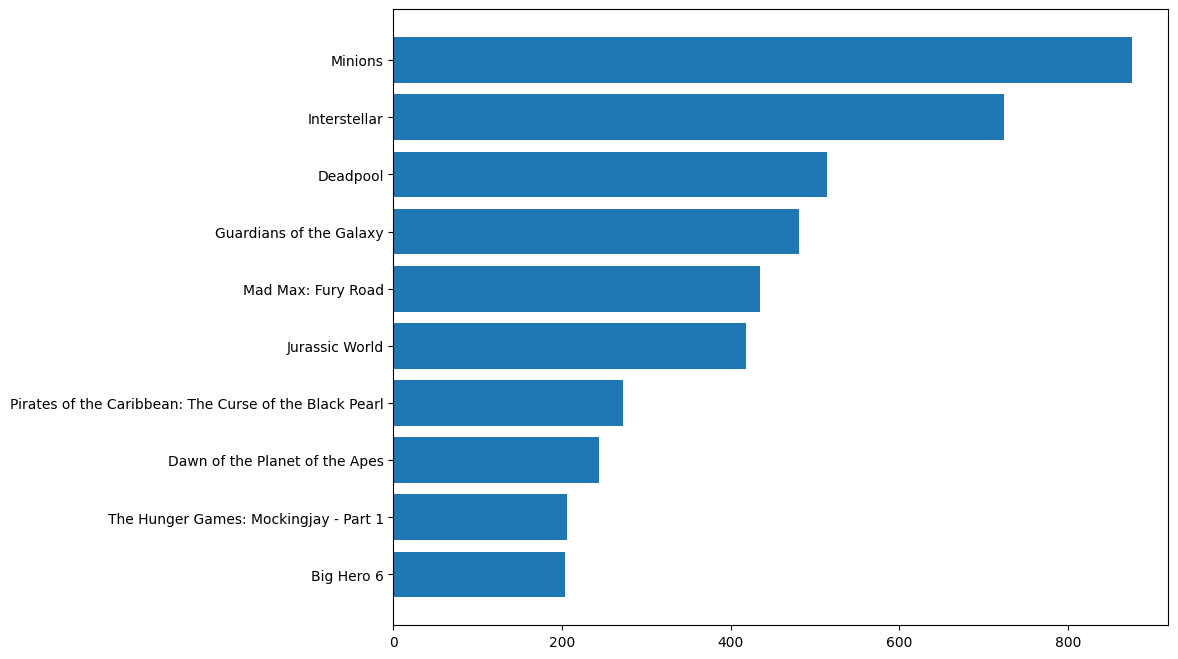

In [17]:
find_popularity()

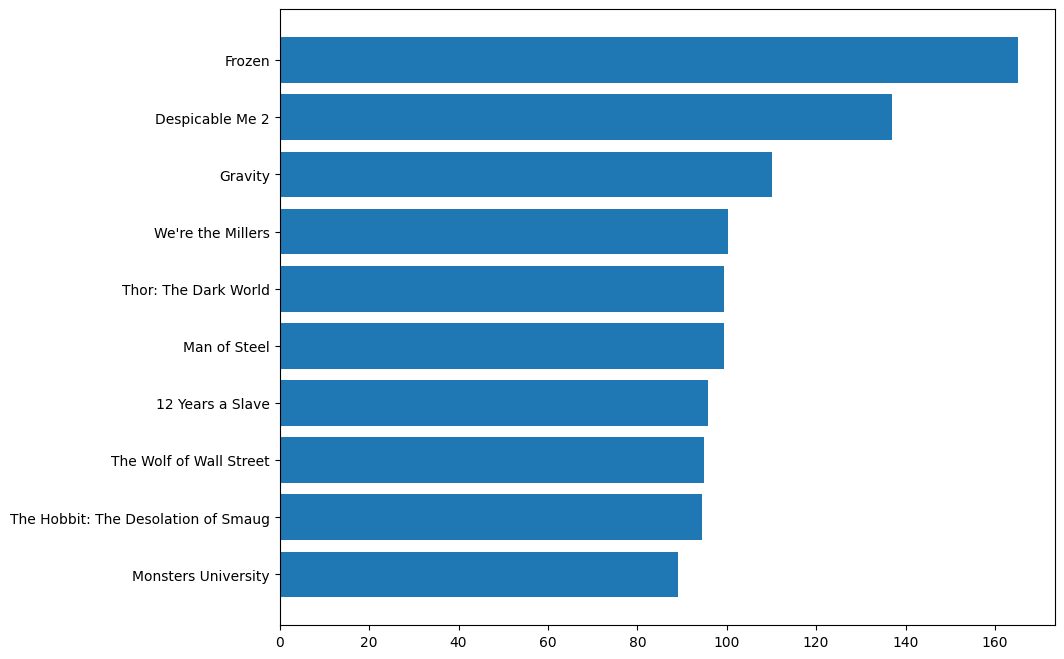

In [18]:
find_popularity(2013) 

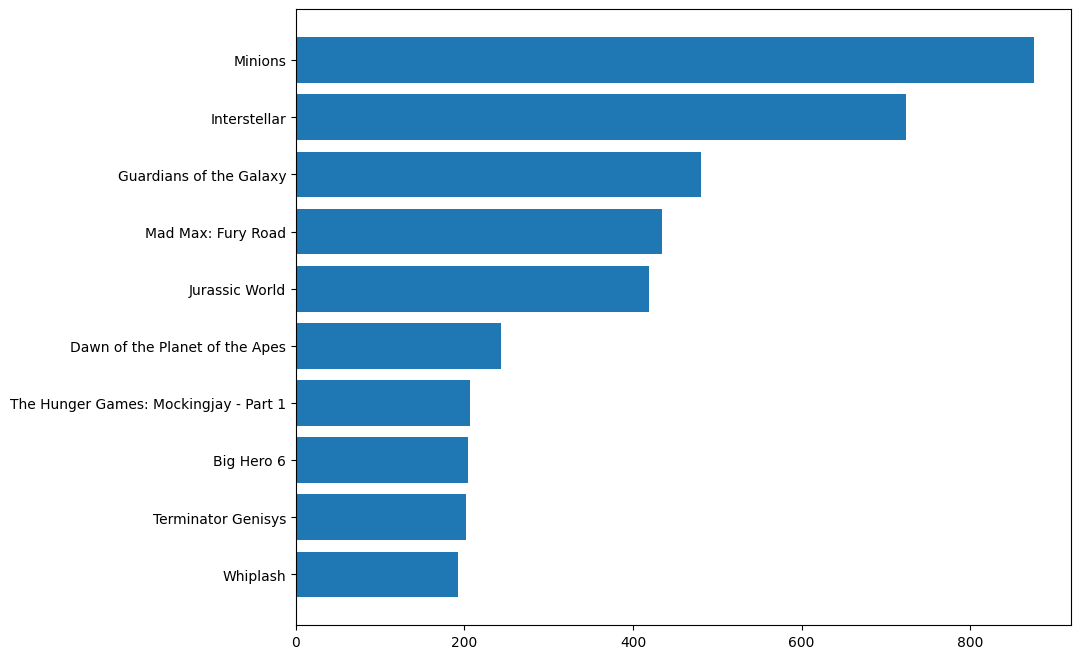

In [19]:
find_popularity(2013,2015) # For the 2013 <= year <= 2015

Genres with high popularity over all years ?

In [20]:
def find_genres(year_1 = 0 , year_2 = 0) :
    sorted_popularity = df_EDA.sort_values(by = 'popularity',ascending= False)
    if year_2 == 0 :
        year_2 = year_1
    if year_1 != 0 :
        sorted_popularity.query('year >= @year_1 and year <= @year_2',inplace = True)
    z = list()
    print(sorted_popularity.shape)
    counter = 0
    for i in sorted_popularity['genres'] :
        i = json.loads(i)
        for dic in i :
            dict(dic)
        z.append(dic.get('name'))
        counter +=1
        if counter >=sorted_popularity['genres'].shape[0]/2 :
            break
    unique_genres = set(z)
    counts = dict()
    for i in z:
      counts[i] = counts.get(i, 0) + 1
    plt.subplots(figsize=(10,8))
    plt.gca().invert_yaxis()
    plt.barh(list(counts.keys()),list(counts.values()))

(4802, 20)


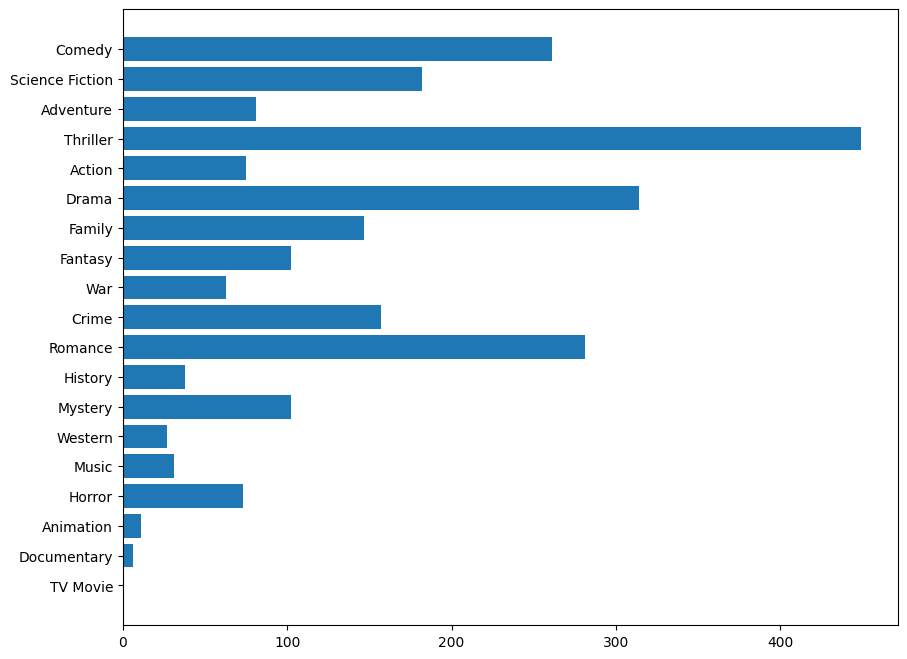

In [21]:
find_genres()

(227, 20)


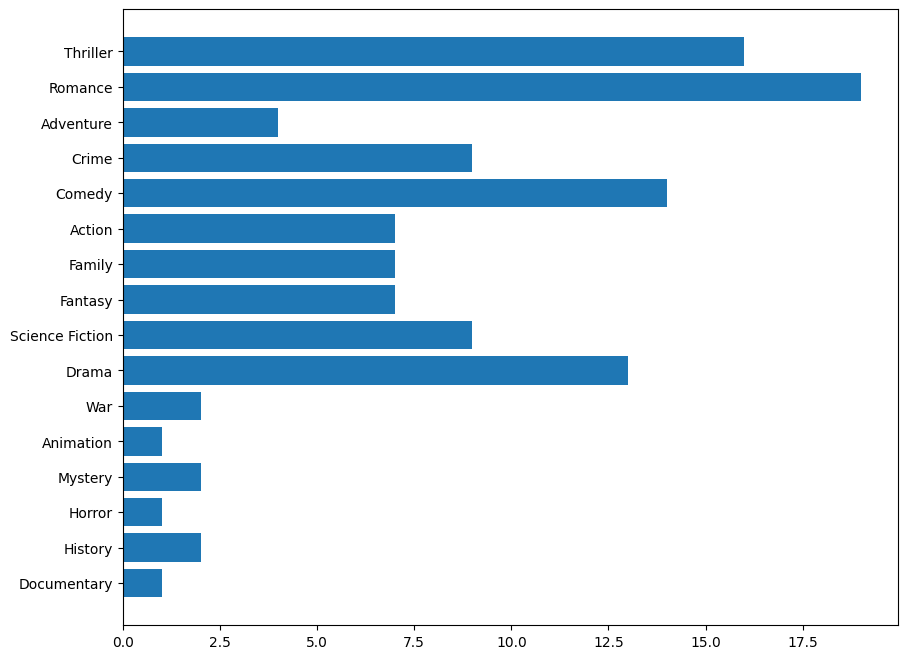

In [22]:
find_genres(2008) # For the year == 2008

(2355, 20)


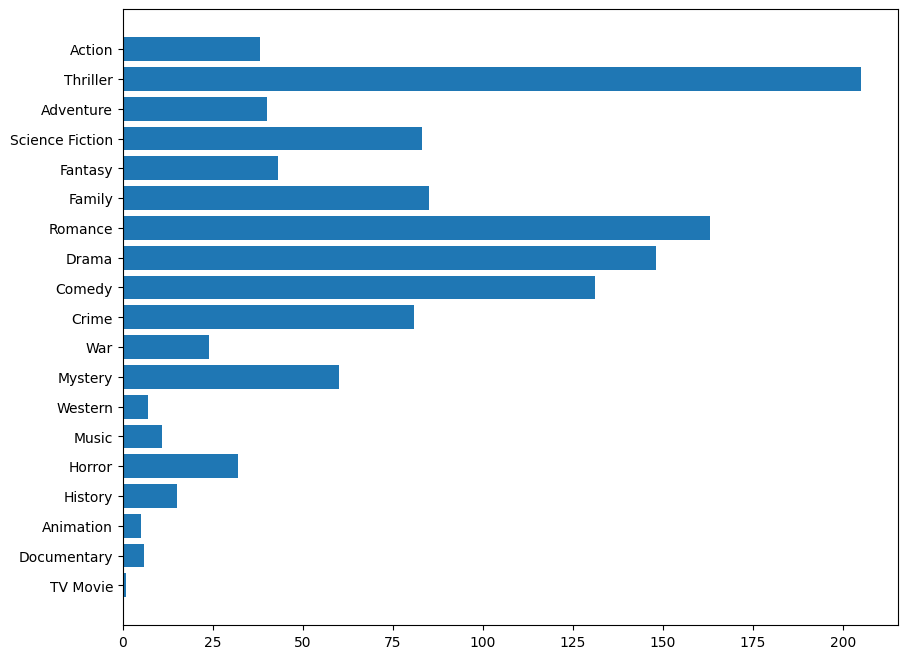

In [23]:
find_genres(2002,2012) # For the 2010 <= year <= 2012

 companies make the high revenues?

In [24]:
sorted_revenues = df_EDA.sort_values(by = 'revenue',ascending= False)
low_revenues = df_EDA[df_EDA['revenue'] < df_EDA['revenue'].median()]
high_revenues = df_EDA[df_EDA['revenue'] >= df_EDA['revenue'].median()]
z = list()
counter = 0
for i in high_revenues['production_companies'] :
    i = json.loads(i)
    for dic in i :
        dict(dic)
    z.append(dic.get('name'))
unique_genres = set(z)
counts = dict()
for i in z:
    counts[i] = counts.get(i, 0) + 1
s = pd.DataFrame(list(counts.values()),list(counts.keys()),columns=['counts'])
s= s.sort_values(by='counts',ascending= False)
print(s)

                                                    counts
Warner Bros.                                            91
Paramount Pictures                                      45
Touchstone Pictures                                     40
Metro-Goldwyn-Mayer (MGM)                               38
Universal Pictures                                      32
...                                                    ...
Internationale Scarena Filmproduktionsgesellsch...       1
Captivate Entertainment                                  1
Cantharus Productions                                    1
Showbox                                                  1
Kathbur Pictures                                         1

[1320 rows x 1 columns]


production companies have produced maximum films?

In [25]:
# Extract Companies from JSON objects
companies_list = []
for companies_str in df_EDA['production_companies']:
    data = json.loads(companies_str)
    names = [item['name'] for item in data]
    companies_list.extend(names)
companies_count = {i:companies_list.count(i) for i in companies_list}
# Sort the dictionary by company count
sorted_companies_count = dict(sorted(companies_count.items(),
                                     key=lambda item: item[1], reverse=True))

# Display sorted companies and their counts
for i, (company, count) in enumerate(sorted_companies_count.items()):
    if i < 5:
        print(f"{company}: {count}")
    else:
        break

Warner Bros.: 319
Universal Pictures: 311
Paramount Pictures: 285
Twentieth Century Fox Film Corporation: 222
Columbia Pictures: 201


### Correlation

Correlation between attributes?

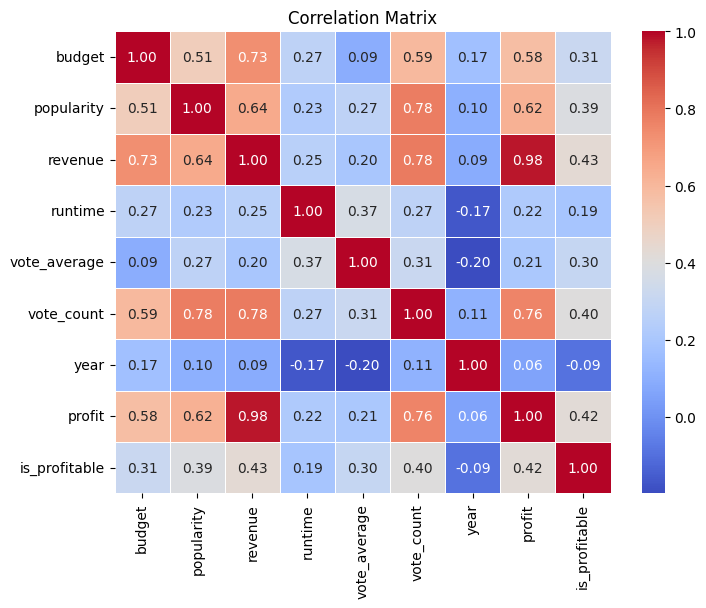

In [28]:
columns_for_corr = ['budget', 'popularity', 'revenue', 'runtime',
                    'vote_average', 'vote_count', 'year', 'profit', 'is_profitable']
df_EDA_corr = df_EDA[columns_for_corr]
correlation_matrix = df_EDA_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Changes over years

movie budget and revenue changed over time?

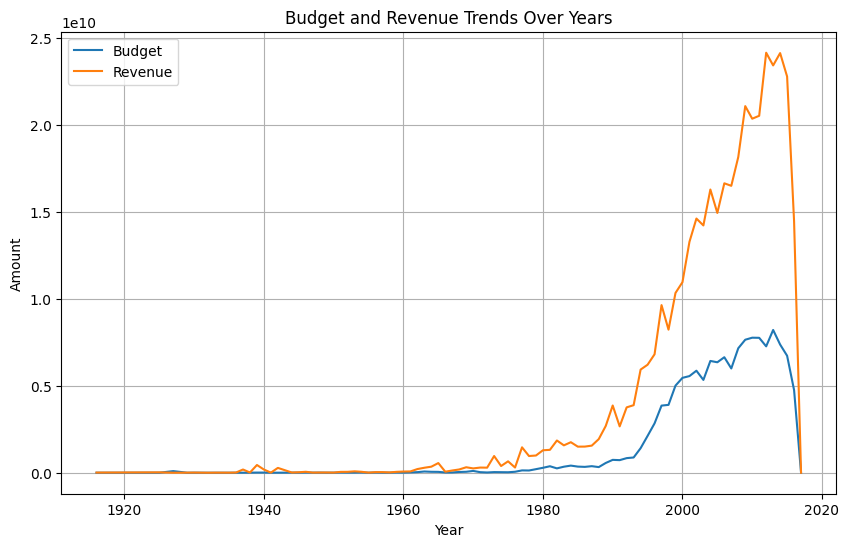

In [29]:
data_release_date = df_EDA.sort_values('year')
budget1 = data_release_date.groupby('year')['budget'].sum()
revenue1 = data_release_date.groupby('year')['revenue'].sum()
plt.figure(figsize=(10, 6))
plt.plot(budget1.index, budget1.values, label='Budget')
plt.plot(revenue1.index, revenue1.values, label='Revenue')
plt.title('Budget and Revenue Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)

genre trends have changed throughout the years?

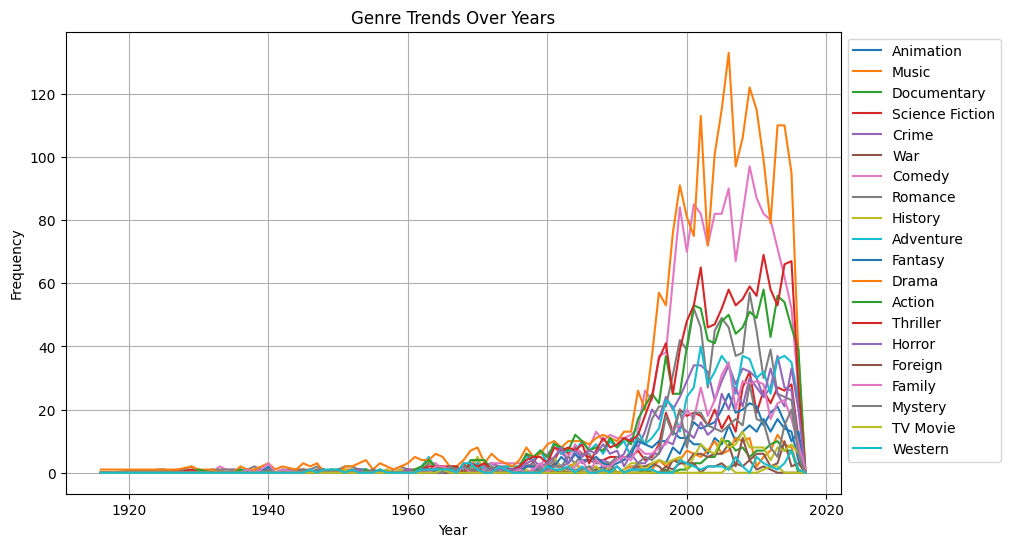

In [30]:
# Extract genres from JSON objects
genres_list = []
for genre_str in data_release_date['genres']:
    data = json.loads(genre_str)
    names = [item['name'] for item in data]
    genres_list.extend(names)

# Create a set of unique genres
unique_genres = set(genres_list)

# Initialize a dictionary to store genre counts for each year
genre_counts = {genre: [] for genre in unique_genres}

# Calculating the count of each genre in each year
for year in sorted(data_release_date['year'].unique()):
    year_data = data_release_date[data_release_date['year'] == year]
    genres_list = []
    for genre_str in year_data['genres']:
        data = json.loads(genre_str)
        names = [item['name'] for item in data]
        genres_list.extend(names)
    genres_list = {i : genres_list.count(i) for i in genres_list}
    for genre in unique_genres:
        try:
            genre_counts[genre].append(genres_list[genre])
        except KeyError:
            genre_counts[genre].append(0)

# Plot trend lines for each genre
plt.figure(figsize=(10, 6))
for genre in unique_genres:
    plt.plot(data_release_date['year'].unique(), genre_counts[genre], label=genre)

plt.title('Genre Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


Runtime of movies has changed over the years?

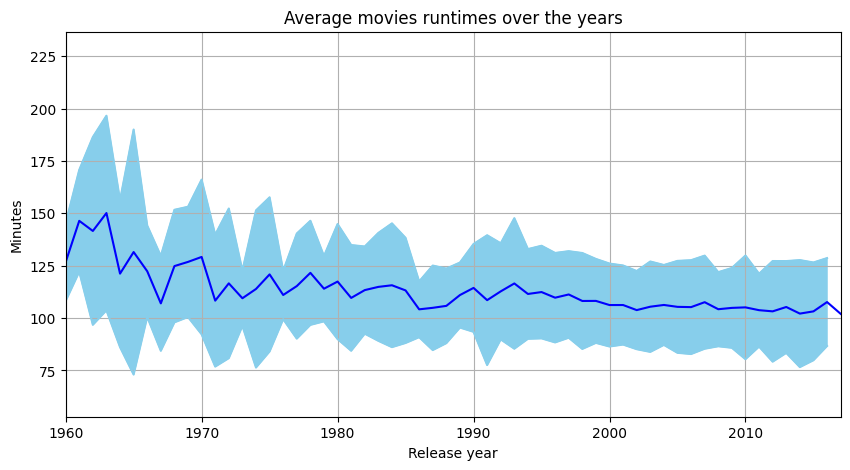

In [31]:
grouped_data = df_EDA['runtime'].groupby(df_EDA['year']).describe()
avg_runtime_by_year = grouped_data['mean']
avg_runtime_min = grouped_data['mean'] - grouped_data['std']
avg_runtime_max = grouped_data['mean'] + grouped_data['std']
fig, x = plt.subplots(figsize=(10,5))
x.plot(avg_runtime_by_year, color='blue')
x.plot(avg_runtime_min, color='skyblue')
x.plot(avg_runtime_max, color='skyblue')
x.fill_between(grouped_data.index, avg_runtime_min,
               avg_runtime_max, color="skyblue")
x.set_title('Average movies runtimes over the years')
x.set_xlabel('Release year')
x.set_ylabel('Minutes')
x.set_xlim(1960,2017)
plt.grid(True)
plt.show()

Years/months with max number of movie releases?

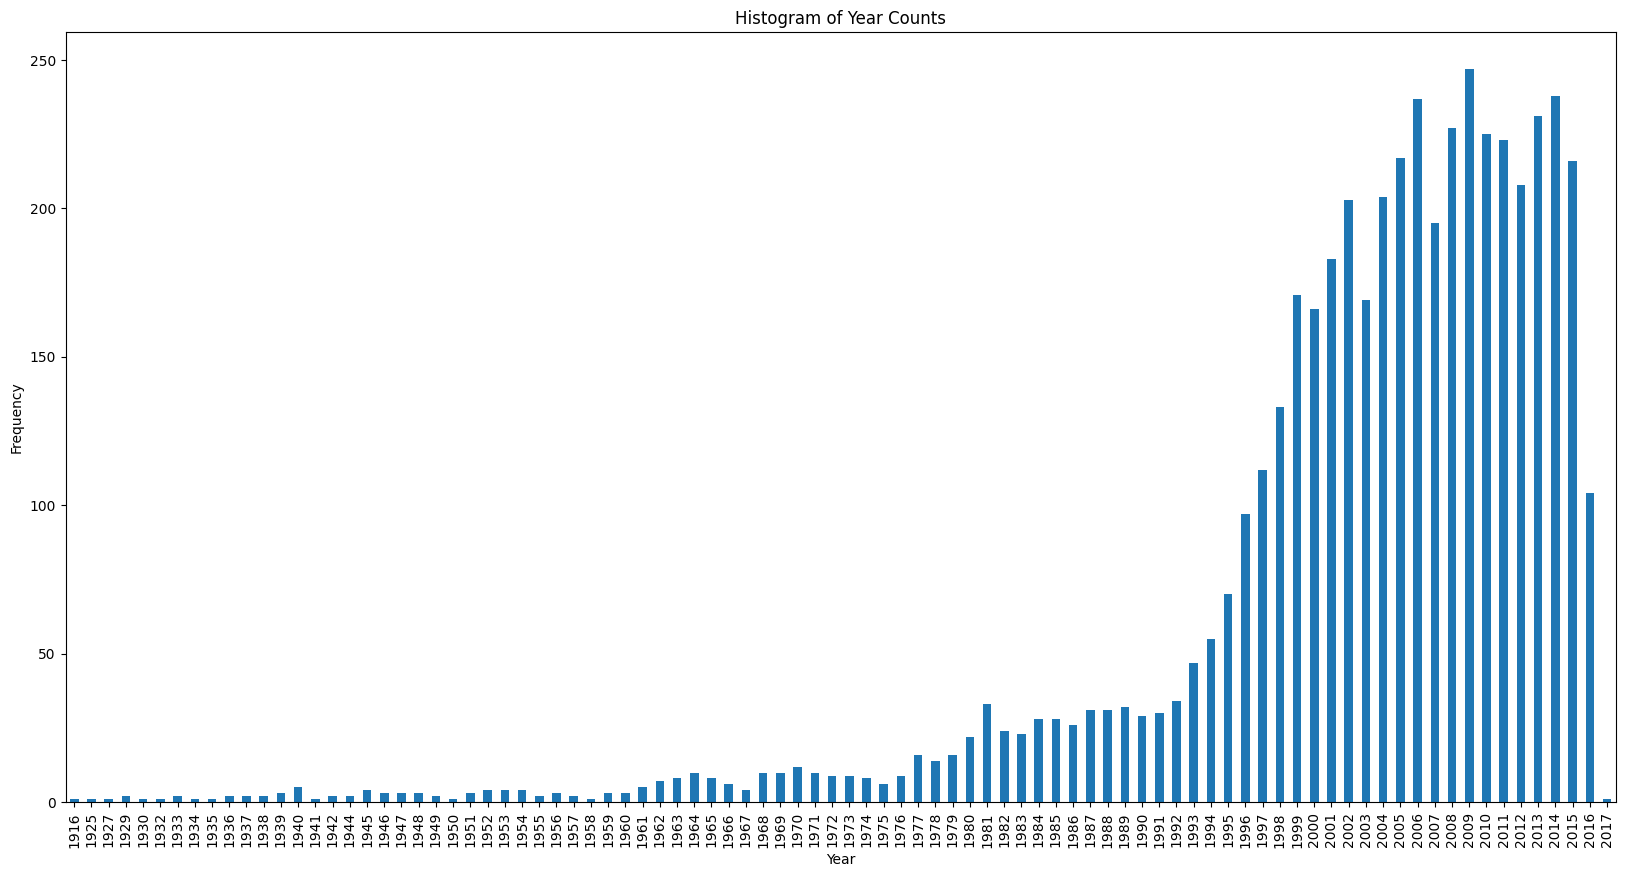

In [32]:
year_count = df_EDA.sort_values('year').groupby('year').size()
plt.figure(figsize=(20, 10))
year_count.plot(kind = 'bar')
plt.xticks(rotation= 90)
plt.title('Histogram of Year Counts')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

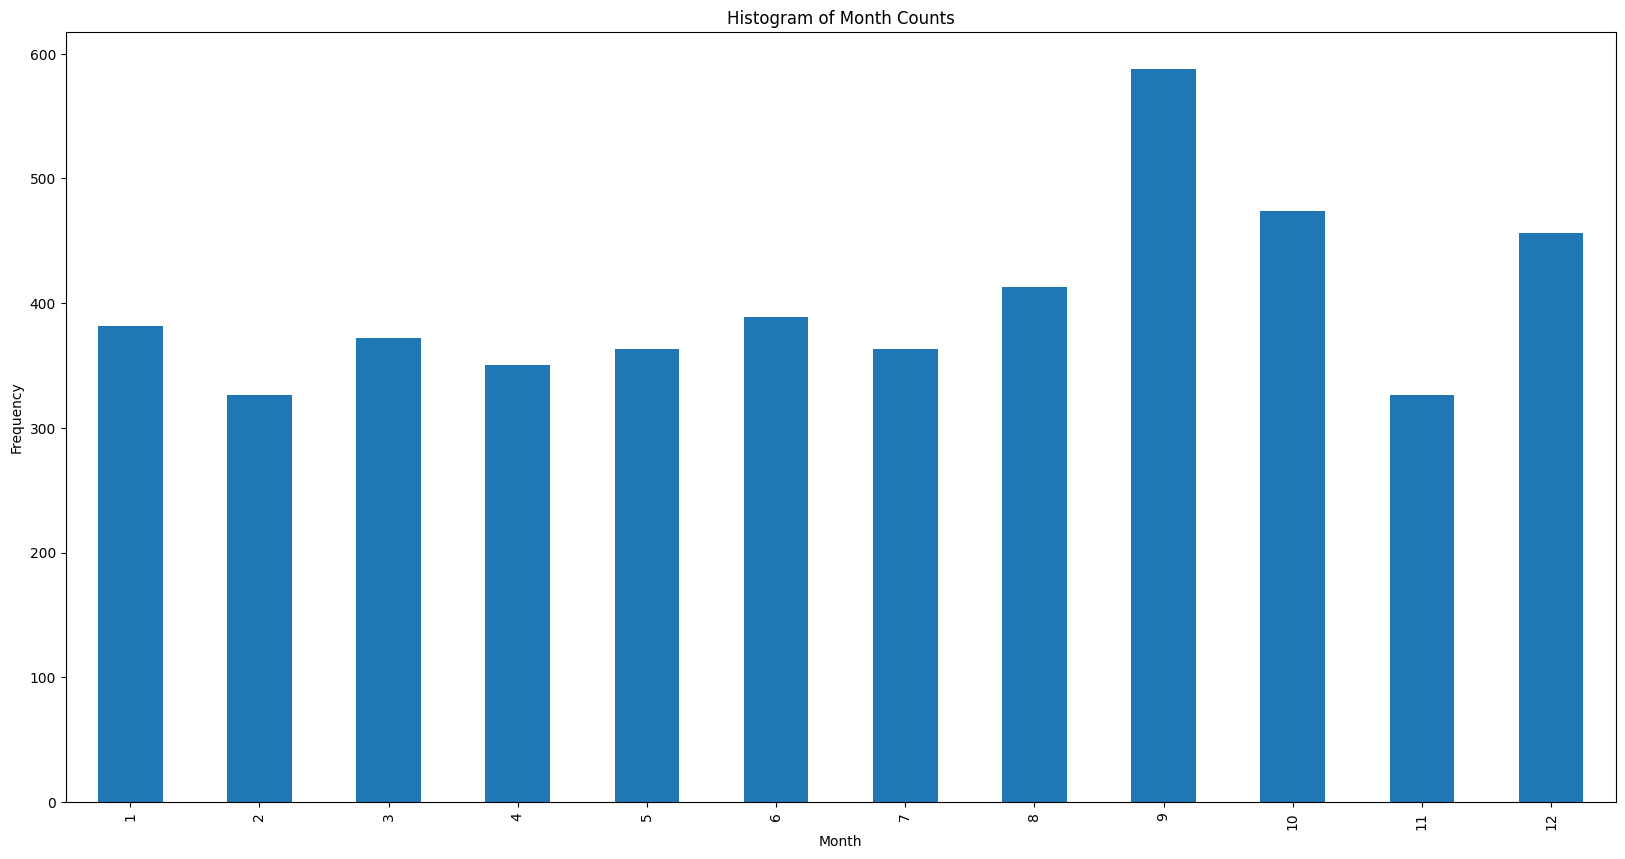

In [33]:
df_EDA['month'] = df_EDA['release_date'].dt.month
month_count = df_EDA.groupby('month').size()
plt.figure(figsize=(20, 10))
month_count.plot(kind='bar')
plt.title('Histogram of Month Counts')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

 Vote counts for movies have changed over the years?

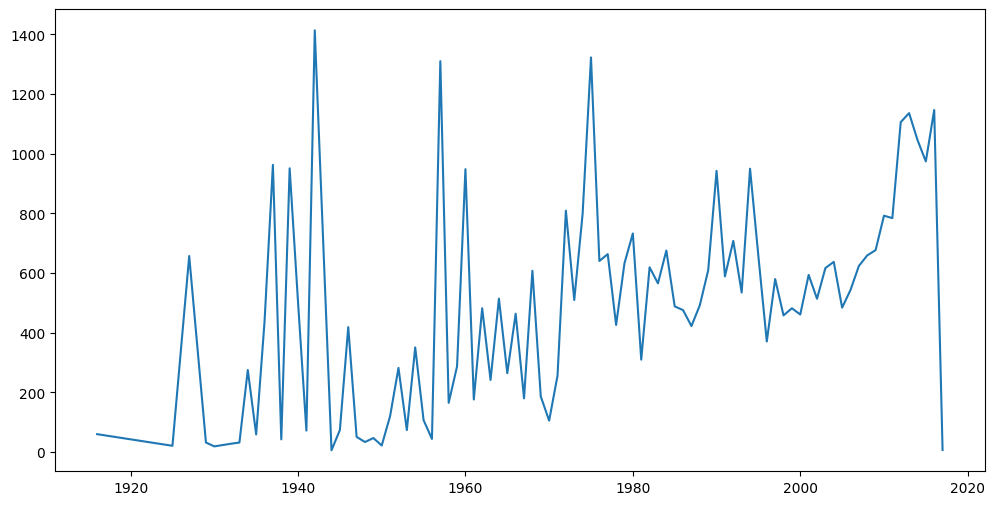

In [34]:
plt.figure(figsize=(12,6))
grouped_data = df_EDA.groupby('year')['vote_count'].mean()
plt.plot(grouped_data.index, grouped_data)
plt.show()

### Keywords

 Most used keywords from the dataset?

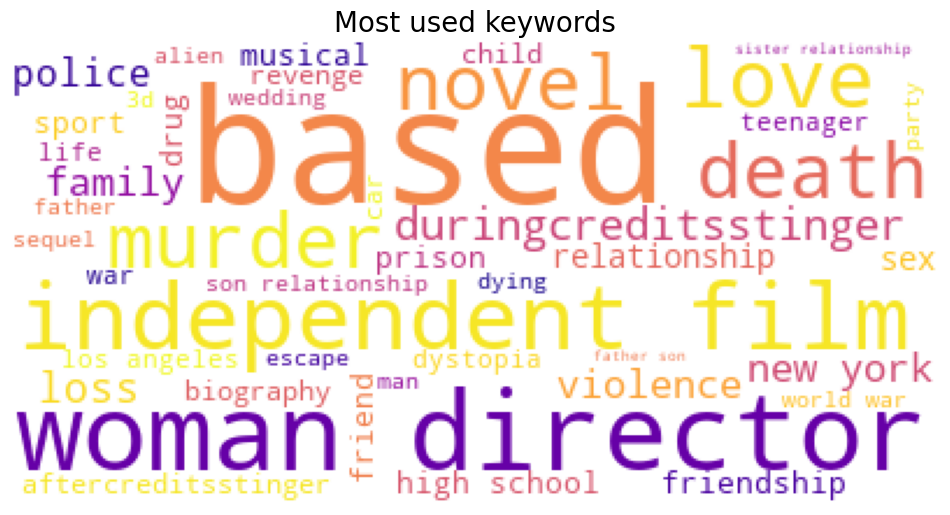

In [35]:
text = ','.join(' '.join([item['name'] for item in json.loads(keyword)])
                for keyword in df_EDA['keywords'])
wc = WordCloud(max_words=100, background_color='white',
               colormap='plasma').generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.title("Most used keywords", fontsize = 20)
plt.axis('off')  # Hide axis
plt.show()

**Result**:
+ The word cloud provides an overview of the popular themes, genres, and concepts present in the movies included in the dataset.

### Cast and their Effects

 Top 50 most popular actors?

In [36]:
# Initialize a dictionary to store actors and their cumulative popularity
actors_popularity = {}

# Iterate through each movie
for index, row in df_EDA.iterrows():
    cast = json.loads(row['cast'])
    popularity = row['popularity']

    # Accumulate popularity for each actor
    for actor in cast:
        actor_name = actor['name']
        actors_popularity[actor_name] = actors_popularity.get(actor_name, 0) + popularity

# Sort actors by cumulative popularity
sorted_actors = sorted(actors_popularity.items(),
                       key=lambda x: x[1], reverse=True)

# Select the top 50 actors
top_50_actors = sorted_actors[:50]
top_50_name = []
# Print the top 20 actors
for rank, (actor, popularity) in enumerate(top_50_actors, 1):
    print(f"Rank {rank}: {actor} - Cumulative Popularity: {popularity}")
    top_50_name.append(actor)


Rank 1: Stan Lee - Cumulative Popularity: 3148.7651520000004
Rank 2: Samuel L. Jackson - Cumulative Popularity: 2393.0473450000004
Rank 3: Matt Damon - Cumulative Popularity: 2324.211831000002
Rank 4: Morgan Freeman - Cumulative Popularity: 2144.355814000001
Rank 5: Geoffrey Rush - Cumulative Popularity: 2137.0505050000006
Rank 6: Johnny Depp - Cumulative Popularity: 2039.1833910000003
Rank 7: Michael Caine - Cumulative Popularity: 1898.682553
Rank 8: Bruce Willis - Cumulative Popularity: 1886.381318
Rank 9: Liam Neeson - Cumulative Popularity: 1855.6116000000002
Rank 10: Steve Carell - Cumulative Popularity: 1749.8587720000005
Rank 11: Brad Pitt - Cumulative Popularity: 1732.6732020000002
Rank 12: Anne Hathaway - Cumulative Popularity: 1605.035601
Rank 13: Gary Oldman - Cumulative Popularity: 1603.6700620000006
Rank 14: Steve Coogan - Cumulative Popularity: 1602.0252750000002
Rank 15: Ava Acres - Cumulative Popularity: 1584.745711
Rank 16: Tom Hanks - Cumulative Popularity: 1582.86127

Count of popular actors (from last Question) affect the revenue?

In [37]:
top_50_name

['Stan Lee',
 'Samuel L. Jackson',
 'Matt Damon',
 'Morgan Freeman',
 'Geoffrey Rush',
 'Johnny Depp',
 'Michael Caine',
 'Bruce Willis',
 'Liam Neeson',
 'Steve Carell',
 'Brad Pitt',
 'Anne Hathaway',
 'Gary Oldman',
 'Steve Coogan',
 'Ava Acres',
 'Tom Hanks',
 'Michael Keaton',
 'Joseph Oliveira',
 'Robert De Niro',
 'John Ratzenberger',
 'Allison Janney',
 'Sandra Bullock',
 'Cate Blanchett',
 'Stanley Tucci',
 'Scarlett Johansson',
 'Bill Hader',
 'Tom Cruise',
 'Frank Welker',
 'Zoe Saldana',
 'Arnold Schwarzenegger',
 'Matthew McConaughey',
 'Judy Greer',
 'Orlando Bloom',
 'Andy Serkis',
 'Chris Pratt',
 'Alan Tudyk',
 'Josh Brolin',
 'Robert Downey Jr.',
 'Sean Bean',
 'Hugo Weaving',
 'Elizabeth Banks',
 'Kristen Wiig',
 'Casey Affleck',
 'J.K. Simmons',
 'Ryan Reynolds',
 'Paul Bettany',
 'Harrison Ford',
 'Steve Buscemi',
 'Will Smith',
 'Stellan Skarsgård']

In [38]:
# Check if each actor in the DataFrame is among the top 50 actors
df_EDA['in_top_50'] = df_EDA['cast'].apply(lambda x: sum(actor['name'] in top_50_name for actor in json.loads(x)))
df_EDA['in_top_50']

0       1
1       4
2       0
3       5
4       0
       ..
4798    0
4799    0
4800    0
4801    0
4802    1
Name: in_top_50, Length: 4802, dtype: int64

## Modeling

In [40]:
df_ML = df_EDA.copy(deep = True)
mean_profit = df_ML['profit'].mean()
std_profit = df_ML['profit'].std()

# Define the success criterion function
def is_successful(profit):
    if  profit >= mean_profit + std_profit:
      return 1
    return 0

df_ML['is_successful'] = df_ML['profit'].apply(is_successful)
df_ML

,cast,crew,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,...,status,title,vote_average,vote_count,year,profit,is_profitable,month,in_top_50,is_successful
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,Released,Avatar,7.2,11800,2009,2550965087,True,12,1,1
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,661000000,True,5,4,1
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,...,Released,Spectre,6.3,4466,2015,635674609,True,10,0,1
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,...,Released,The Dark Knight Rises,7.6,9106,2012,834939099,True,7,5,1
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,...,Released,John Carter,6.1,2124,2012,24139100,True,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,...,Released,El Mariachi,6.6,238,1992,1820920,True,9,0,0
4799,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],en,0.642552,[],[],2011-12-26,...,Released,Newlyweds,5.9,5,2011,-9000,False,12,0,0
4800,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,...,Released,"Signed, Sealed, Delivered",7.0,6,2013,0,False,10,0,0
4801,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",0,[],[],en,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,...,Released,Shanghai Calling,5.7,7,2012,

In [41]:
# Calculate the success rate
success_rate = sum(df_ML['is_successful'] == 1) / len(df_ML) * 100

# Print the success rate with two decimal places
print(f"Success rate is {success_rate:.2f}%")


Success rate is 8.31%


#### Data preprocessing and Data Spliting

In [42]:
columns_for_X = ['budget', 'popularity', 'revenue', 'runtime',
                 'vote_average', 'vote_count', 'year', 'in_top_50']
X = df_ML[columns_for_X]
y = df_ML['is_successful']

In [43]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression(random_state = 0)
classifier_logistic.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [46]:
y_pred_l = classifier_logistic.predict(X_test)

[[879   1]
 [ 40  41]]


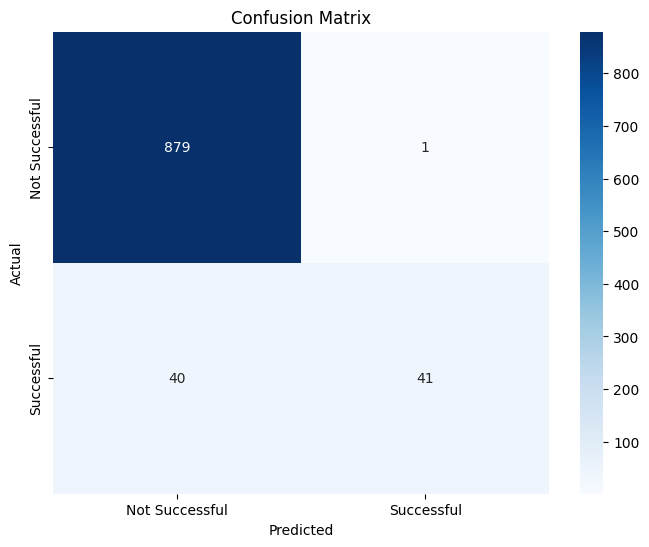

Accuracy: 0.9573
Precision: 0.9762
Recall: 0.5062
F1-Score: 0.6667


In [47]:
cm = confusion_matrix(y_test, y_pred_l)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred_l)
a4 = accuracy_score(y_test, y_pred_l)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_l, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")


#### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
y_pred_d = classifier_dt.predict(X_test)

[[880   0]
 [  2  79]]


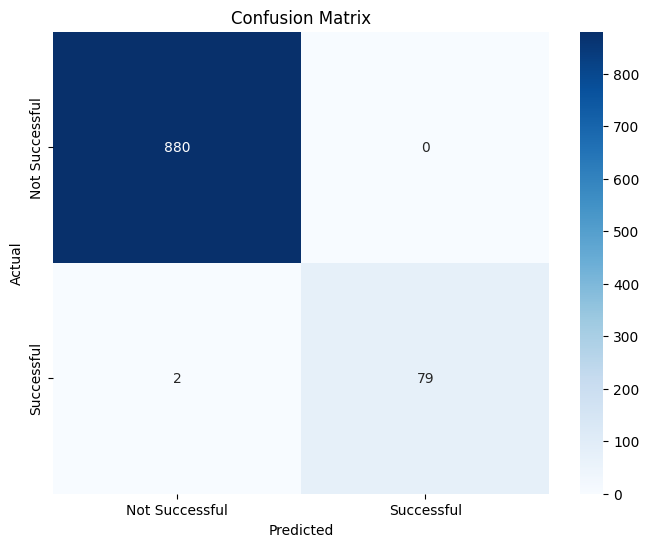

Accuracy: 0.9979
Precision: 1.0000
Recall: 0.9753
F1-Score: 0.9875


In [50]:
cm = confusion_matrix(y_test, y_pred_d)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred_d)
a3 = accuracy_score(y_test, y_pred_d)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_d, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")


#### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10,
                                       criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [52]:
y_pred_r = classifier_rf.predict(X_test)

[[880   0]
 [  7  74]]


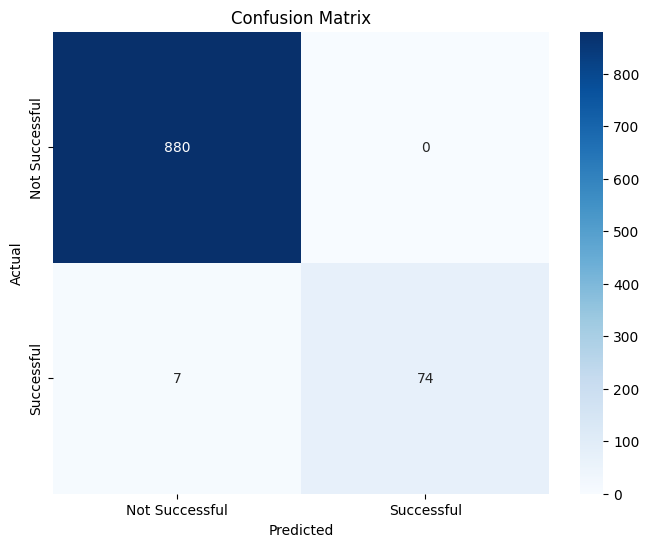

Accuracy: 0.9927
Precision: 1.0000
Recall: 0.9136
F1-Score: 0.9548


In [53]:
cm = confusion_matrix(y_test, y_pred_r)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred_r)
a1 = accuracy_score(y_test, y_pred_r)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_r, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")


#### SVM

In [54]:
from sklearn.svm import SVC
s = SVC(probability=True)
s.fit(X_train, y_train)

SVC(probability=True)

In [55]:
y_pred_s = s.predict(X_test)

[[880   0]
 [ 26  55]]


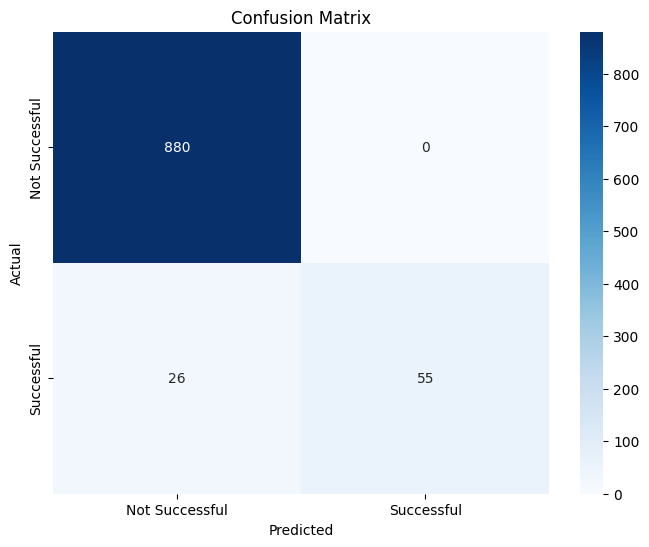

Accuracy: 0.9729
Precision: 1.0000
Recall: 0.6790
F1-Score: 0.8088


In [56]:
cm = confusion_matrix(y_test, y_pred_s)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred_s)
a5 = accuracy_score(y_test, y_pred_s)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_s, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")


#### Naive bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
g = GaussianNB()
g.fit(X_train, y_train)

GaussianNB()

In [58]:
y_pred_g = g.predict(X_test)

[[834  46]
 [ 12  69]]


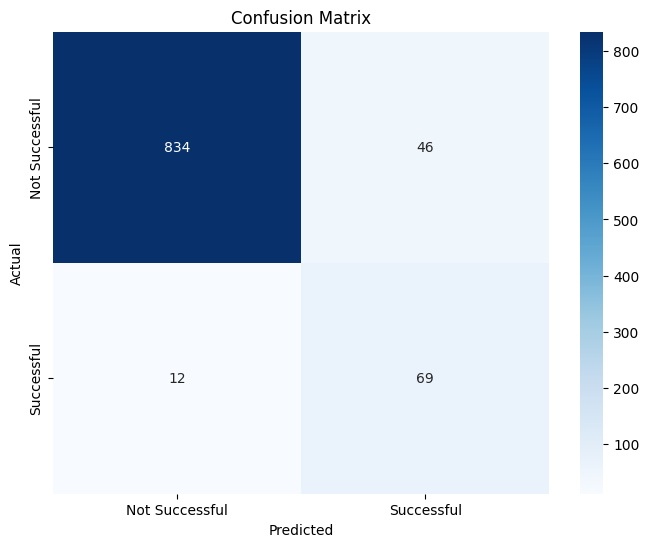

Accuracy: 0.9396
Precision: 0.6000
Recall: 0.8519
F1-Score: 0.7041


In [59]:
cm = confusion_matrix(y_test, y_pred_g)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.show()

accuracy = accuracy_score(y_test, y_pred_g)
a2 = accuracy_score(y_test, y_pred_g)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_g, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")


#### KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
k.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
y_pred_k = k.predict(X_test)

[[878   2]
 [ 32  49]]


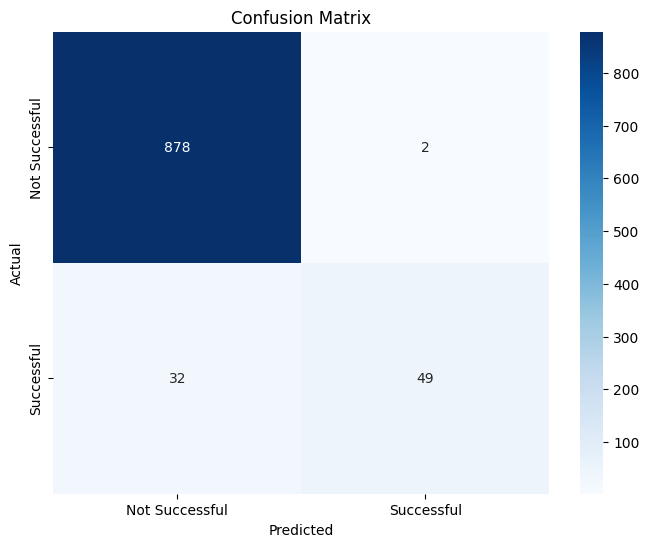

Accuracy: 0.9646
Precision: 0.9608
Recall: 0.6049
F1-Score: 0.7424


In [62]:
cm = confusion_matrix(y_test, y_pred_k)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred_k)
a6 = accuracy_score(y_test, y_pred_k)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_k, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")


#### Xgboost

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
y_pred_x = classifier_xgb.predict(X_test)

[[1316    1]
 [   4  120]]


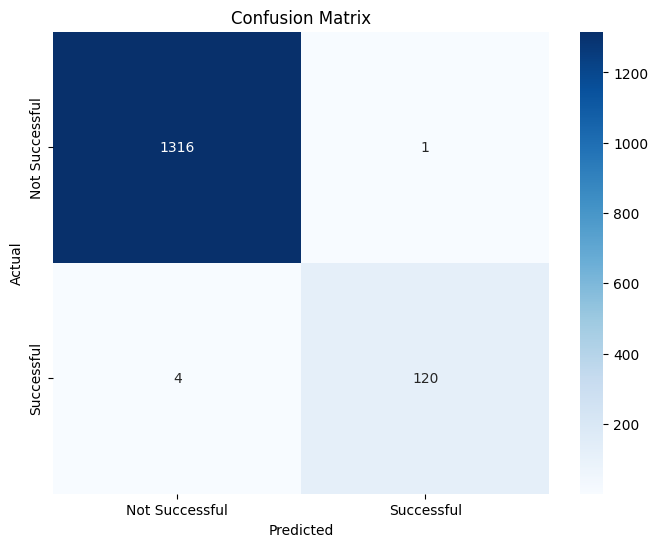

Accuracy: 0.9965
Precision: 0.9917
Recall: 0.9677
F1-Score: 0.9796


In [65]:
cm = confusion_matrix(y_test, y_pred_x)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


accuracy = accuracy_score(y_test, y_pred_x)
a7 = accuracy_score(y_test, y_pred_x)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_x, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

In [66]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_xgb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.43 %
Standard Deviation: 0.45 %


# Saving model

In [83]:
with open('model.pkl', 'wb') as file:
    pickle.dump(classifier_xgb, file)

print(f'Model saved to {'model.pkl'}')

Model saved to model.pkl


#### ROC

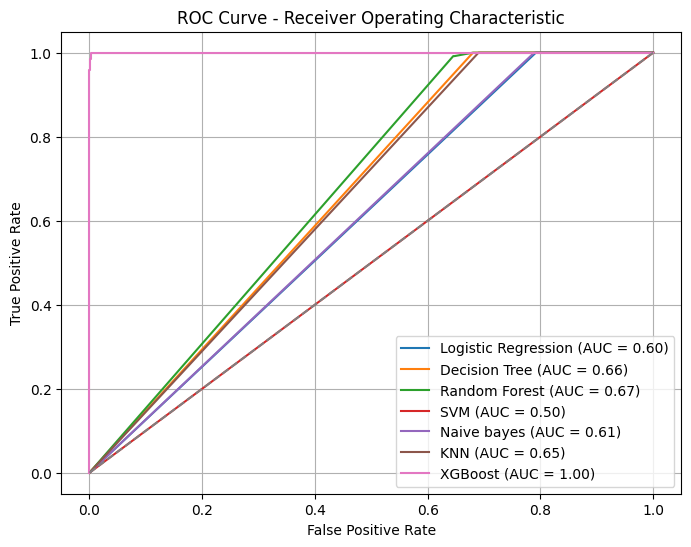

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

models = [classifier_logistic, classifier_dt,
          classifier_rf, s, g, k, classifier_xgb]
model_names = ['Logistic Regression', 'Decision Tree',
               'Random Forest','SVM','Naive bayes', 'KNN','XGBoost']

plt.figure(figsize=(8, 6))

for model, model_name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.grid(True)
plt.show()


## Suggestion Systems

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
df['title'] = df['title'].str.lower()
df['overview'] = df['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(df['overview'])

tfidf_matrix.shape
df

,id,tittle,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",pirates of the caribbean: at world's end,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,the dark knight rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",john carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,...,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",el mariachi,6.6,238
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,[],en,Newlyweds,...,[],26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,newlyweds,5.9,5
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",0,"[

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

In [69]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [70]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
indices

title
avatar                                         0
pirates of the caribbean: at world's end       1
spectre                                        2
the dark knight rises                          3
john carter                                    4
                                            ... 
el mariachi                                 4798
newlyweds                                   4799
signed, sealed, delivered                   4800
shanghai calling                            4801
my date with drew                           4802
Length: 4803, dtype: int64

In [71]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # title = title.lower()

    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    movie_scores = [i[1] for i in sim_scores]

    # Return the top most similar movies
    return df.iloc[movie_indices]['title']

In [72]:
get_recommendations('whiplash')

2106                    drumline
1955              kung fu jungle
3542                        r100
4181      ed and his dead mother
4714    an american in hollywood
Name: title, dtype: object

In [73]:
get_recommendations('superman')

870                          superman ii
10                      superman returns
2433    superman iv: the quest for peace
914                 central intelligence
4659                          horse camp
Name: title, dtype: object

## Deployment

In [74]:
import pickle
# with open('train_test_data.pkl', 'wb') as f:
#     pickle.dump((X, y), f)
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(tfidf_matrix,open('tfidf_matrix.pkl','wb'))
pickle.dump(indices,open('indices.pkl','wb'))

In [75]:
# !pip install -q streamlit

In [76]:
%%writefile movie_suggestion_app1.py
import streamlit as st
import pickle

df = pickle.load(open('df.pkl ', 'rb'))
indices = pickle.load(open('indices.pkl ', 'rb'))
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

df['overview'] = df['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(df['overview'])

# Streamlit app
st.title('Movie Suggestion')

from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# User input for movie title
movie_title = st.text_input('Enter a movie title')
def get_recommendations(title, cosine_sim=cosine_sim):
    title = title.lower()
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    movie_scores = [i[1] for i in sim_scores]

    # # Return the top most similar movies
    # return df.iloc[movie_indices]['title']
    # Return the top most similar movies and their scores
    recommended_movies = df.iloc[movie_indices][['title']]
    recommended_movies['score'] = movie_scores
    return recommended_movies

# Display recommendations
if movie_title:
    try:
        recommendations = get_recommendations(movie_title)
        st.write('Top 5 movie suggestions:')
        for i, row in recommendations.iterrows():
            st.write(f"{row['title']} - Score: {row['score']:.2f}")
    except KeyError:
        st.write("Movie not found. Please check the title and try again.")

Overwriting movie_suggestion_app1.py


## Partial least squares-discriminant analysis

[[1317    0]
 [  56   68]]
Accuracy: 0.9611380985426787
Confusion Matrix:


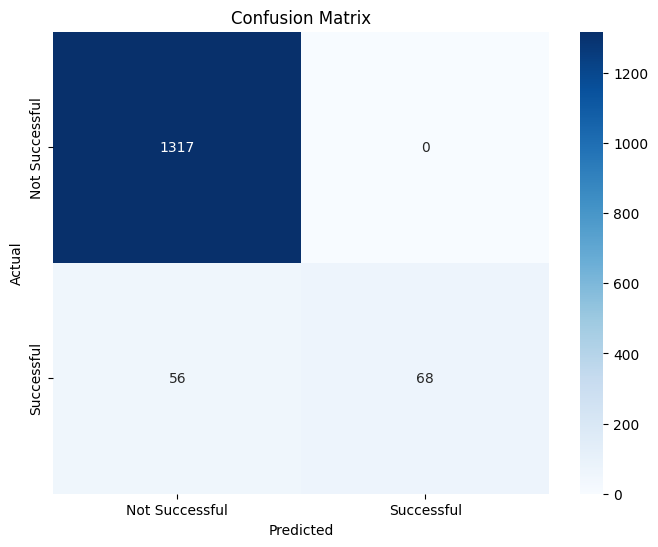

Accuracy: 0.9611
Precision: 1.0000
Recall: 0.5484
F1-Score: 0.7083


In [80]:
from sklearn.cross_decomposition import PLSRegression
import seaborn as sns

pls_da = PLSRegression(n_components=4)
pls_da.fit(X_train, y_train)

y_pred_continuous = pls_da.predict(X_test)
y_pred = np.where(y_pred_continuous > 0.5, 1, 0).flatten()  # Converting predictions to binary

accuracy = accuracy_score(y_test, y_pred)
a8 = accuracy_score(y_test, y_pred)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
# print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

# Compare model Perfrmance

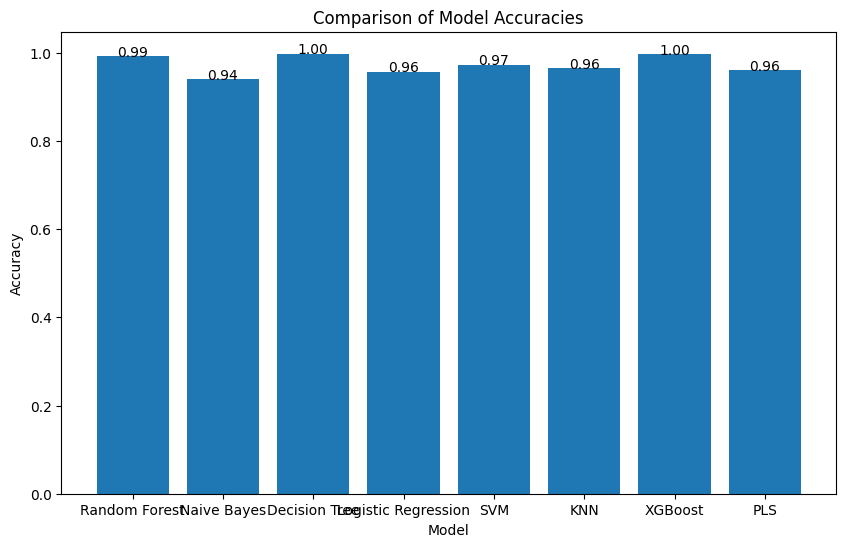

In [82]:
accuracies = [a1, a2, a3, a4, a5, a6, a7, a8]
models = ['Random Forest', 'Naive Bayes','Decision Tree',
          'Logistic Regression', 'SVM', 'KNN', 'XGBoost', 'PLS']
plt.figure(figsize=(10, 6))

plt.bar(models, accuracies)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Add text labels to each bar
for i, v in enumerate(accuracies):
    plt.text(i, v, f"{v:.2f}", color='black', ha='center')

plt.show()

In [86]:
# %%writefile movie_success_app.py
# import streamlit as st
# import pickle
# import numpy as np
# from sklearn.preprocessing import StandardScaler

# # Load the trained model
# model = pickle.load(open('model.pkl', 'rb'))

# # Function to make predictions
# def predict_movie_success(features):
#     # Directly use the features without standardization
#     features = np.array(features).reshape(1, -1)
#     prediction = model.predict(features)
#     return 'Successful' if prediction == 1 else 'Not Successful'

# # Streamlit app
# st.title('Movie Success Prediction')

# # Collect user input
# budget = st.number_input('Budget (in million $)', min_value=0)
# revenue = st.number_input('Revenue (in million $)', min_value=0)
# runtime = st.number_input('Runtime (in minutes)', min_value=0)
# vote_average = st.number_input('Vote Average (1-10)', min_value=0.0, max_value=10.0, step=0.1)
# vote_count = st.number_input('Vote Count', min_value=0)
# popularity = st.number_input('Popularity', min_value=0)

# # Create a button to make predictions
# if st.button('Predict'):
#     # Create feature array
#     features = [budget, revenue, runtime, vote_average, vote_count, popularity]
    
#     # Make prediction
#     result = predict_movie_success(features)
    
#     # Display result
#     st.write(f'The movie is predicted to be: {result}')


Overwriting movie_success_app.py


In [90]:
%%writefile movie_success_app.py
import streamlit as st
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the trained model
model = pickle.load(open('model.pkl', 'rb'))

# Define the feature columns
feature_columns = ['budget', 'popularity', 'revenue', 'runtime',
                   'vote_average', 'vote_count', 'year', 'in_top_50']

# Function to make predictions
def predict_movie_success(features):
    # Scale the features using MinMaxScaler
    scaler = MinMaxScaler()
    features = np.array(features, dtype=float).reshape(1, -1)
    features = scaler.fit_transform(features) 
    
    # Make prediction
    prediction = model.predict(features)
    return 'Successful' if prediction == 1 else 'Not Successful'

# Streamlit app
st.title('Movie Success Prediction')

# Collect user input
budget = st.number_input('Budget (in million $)', min_value=0)
popularity = st.number_input('Popularity', min_value=0.0)
revenue = st.number_input('Revenue (in million $)', min_value=0)
runtime = st.number_input('Runtime (in minutes)', min_value=0)
vote_average = st.number_input('Vote Average (1-10)', min_value=0.0,
                               max_value=10.0, step=0.1)
vote_count = st.number_input('Vote Count', min_value=0)
year = st.number_input('Year', min_value=1900, max_value=2100, step=1)
in_top_50 = st.selectbox('Is the movie in top 50?', options=['Yes', 'No'])

# Convert in_top_50 to binary
in_top_50_binary = 1 if in_top_50 == 'Yes' else 0

# Create a button to make predictions
if st.button('Predict'):
    # Create feature array
    features = [budget, popularity, revenue, runtime,
                vote_average, vote_count, year, in_top_50_binary]
    
    # Make prediction
    result = predict_movie_success(features)
    
    # Display result
    st.write(f'The movie is predicted to be: {result}')


Overwriting movie_success_app.py
